In [1]:
import pandas as pd
from pathlib import Path
from omegaconf import OmegaConf
import numpy as np

ground_truth_csv = Path(
    "/teamspace/studios/this_studio/lightning-pose/data/mirror-mouse/CollectedData_new.csv"
)

base_dir = Path("/teamspace/studios/this_studio/lightning-pose/outputs/ood_preds/")

model_names = [
    "model_sup_1",
    "model_sup_2",
    "model_unsup_1",
    "model_unsup_2",
]

pred_csv_paths = [
    base_dir / model_name / "predictions_new.csv" for model_name in model_names
]
error_csv_paths = [
    base_dir / model_name / "predictions_new_pixel_error.csv"
    for model_name in model_names
]


df_pred_list = []
df_error_list = []

for path in pred_csv_paths:
    df = pd.read_csv(path, header=[0, 1, 2], index_col=0).sort_index()
    df_pred_list.append(df)

for path in error_csv_paths:
    df = pd.read_csv(path, header=[0], index_col=0).sort_index()
    if "set" in df.columns:
        df = df.drop(columns=["set"])
    df_error_list.append(df)

df_error_list[0]

,paw1LH_top,paw2LF_top,paw3RF_top,paw4RH_top,tailBase_top,tailMid_top,nose_top,obs_top,paw1LH_bot,paw2LF_bot,paw3RF_bot,paw4RH_bot,tailBase_bot,tailMid_bot,nose_bot,obsHigh_bot,obsLow_bot
labeled-data/180607_004/img015278.png,NaN,4.431496,8.491647,1.443681,1.008681,4.294611,3.030146,NaN,1.824807,2.077300,2.059229,0.828996,1.246787,0.941277,0.753753,NaN,NaN
labeled-data/180607_004/img015320.png,3.230632,0.324635,2.378217,0.117578,0.913110,5.534289,3.074615,NaN,2.153559,1.125761,0.959603,1.424287,0.630650,0.485080,1.130114,NaN,NaN
labeled-data/180607_004/img015814.png,14.773251,2.546893,1.136948,12.215207,0.486460,6.955748,2.386739,NaN,5.450748,2.965350,0.591085,3.928186,4.676313,3.269372,1.224764,NaN,NaN
labeled-data/180607_004/img015879.png,NaN,0.892790,3.689151,4.512873,3.315468,0.699279,2.414993,NaN,0.395373,2.873286,1.973286,2.155566,2.232262,3.005530,3.061180,NaN,NaN
labeled-data/180607_004/img016209.png,NaN,3.607674,0.639366,76.927554,5.211449,18.884228,1.026153,NaN,10.174865,4.667774,0.747972,4.078670,10.372386,8.369896,2.093469,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
labeled-data/180623_000/img107228.png,1.776269,111.873568,1.711601,14.765917,1.704879,8.215659,3.911553,2.092253,0.937567,4.199104,1.826673,2.081443,3.049503,0.310610,1.618794,0.874928,10.483317
labeled-data/180623_000/img107258.png,34.518593,2.590857,1.852147,1.023134,NaN,NaN,3.308859,2.184040,7.194635,1.559392,1.969171,3.810229,5.629057,4.024977,2.021244,6.655859,19.758406
labeled-data/180623_000/img107262.png,NaN,2.666510,2.466280,2.732411,NaN,NaN,3.751411,3.271596,2.746747,1.672041,4.005851,3.885580,6.189030,2.700678,1.325321,6.079651,14.772158
labeled-data/180623_000/img107273.png,6.433108,4.319482,2.683306,191.307078,27.320292,137.093584,4.499618,4.637464,5.618808,3.682572,1.419729,6.943945,3.575611,9.655401,1.958411,3.906814,9.907969


In [2]:
def _get_keypoints(model_dir):
    cfg = OmegaConf.load(base_dir / model_dir / "config.yaml")
    return cfg.data.keypoint_names

keypoints = _get_keypoints(model_names[0])

In [3]:
# compute ensemble variance
df_gt = pd.read_csv(ground_truth_csv, header=[0, 1, 2], index_col=0).sort_index()

from pseudo_labeler.evaluation import compute_ensemble_stddev
ens_stddev = compute_ensemble_stddev(
    df_gt, # Why do we need the ground truth to compute ensemble stddev?
    df_pred_list,
    keypoints
)

DataFrame 0 kept columns: MultiIndex([('standard_scorer',   'paw1LH_top', 'x'),
            ('standard_scorer',   'paw1LH_top', 'y'),
            ('standard_scorer',   'paw2LF_top', 'x'),
            ('standard_scorer',   'paw2LF_top', 'y'),
            ('standard_scorer',   'paw3RF_top', 'x'),
            ('standard_scorer',   'paw3RF_top', 'y'),
            ('standard_scorer',   'paw4RH_top', 'x'),
            ('standard_scorer',   'paw4RH_top', 'y'),
            ('standard_scorer', 'tailBase_top', 'x'),
            ('standard_scorer', 'tailBase_top', 'y'),
            ('standard_scorer',  'tailMid_top', 'x'),
            ('standard_scorer',  'tailMid_top', 'y'),
            ('standard_scorer',     'nose_top', 'x'),
            ('standard_scorer',     'nose_top', 'y'),
            ('standard_scorer',      'obs_top', 'x'),
            ('standard_scorer',      'obs_top', 'y'),
            ('standard_scorer',   'paw1LH_bot', 'x'),
            ('standard_scorer',   'paw1LH_bot', 'y'),
  

In [4]:
# Record pixel errors along with ensemble variances
df_w_vars = []
for df_error, model_name in zip(df_error_list, model_names):
    # Ensure df_error has the same index as df_gt
    df_error.index = df_gt.index
    
    # Calculate total pixel error (sum) for each df_error and print it
    total_pixel_error = df_error.sum().sum()
    print(f"Total pixel error for model {model_name}: {total_pixel_error}")

    for i, kp in enumerate(df_error.columns):
        df_w_vars.append(pd.DataFrame({
            'pixel_error': df_error[kp],
            'ens-std': ens_stddev[:, i],
            'ens-std-prctile': [np.sum(ens_stddev < p) / ens_stddev.size for p in ens_stddev[:, i]],
            'ens-std-prctile-kp': [np.sum(ens_stddev[:, i] < p) / ens_stddev[:, i].size for p in ens_stddev[:, i]], 
            'keypoint': kp,
            'model': model_name,
        }, index=df_error.index))

df_w_vars = pd.concat(df_w_vars)

Total pixel error for model model_sup_1: 25976.141895809218
Total pixel error for model model_sup_2: 31308.11582681641
Total pixel error for model model_unsup_1: 22452.42308882073
Total pixel error for model model_unsup_2: 23210.60754459308


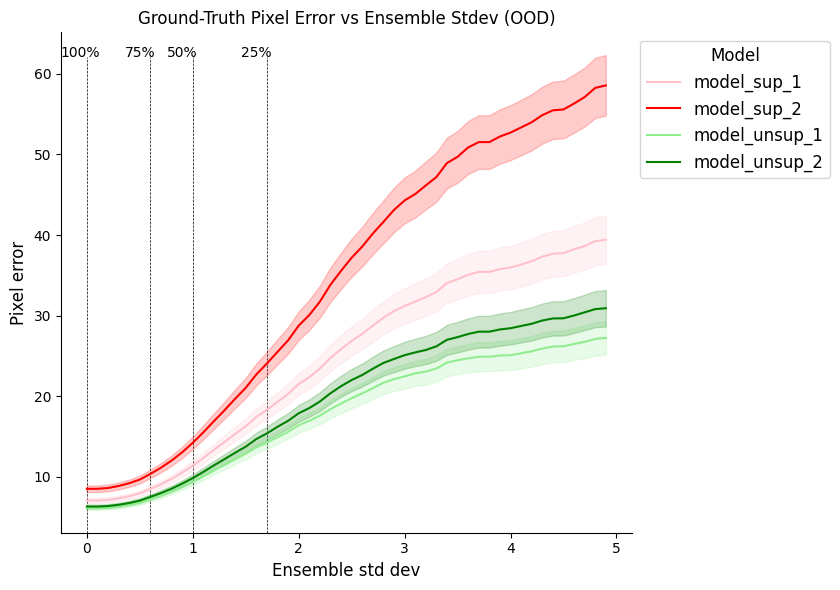

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pseudo_labeler.evaluation import cleanaxis, compute_percentiles


def plot(
    model_names_list,
    df_line2,
    percentiles,
    percentile_values,
    legend_labels,
    color_mapping
):
    """Plots ground-truth pixel error against ensemble standard deviation.

    Args:
        std_vals: A sequence of standard deviation values for the x-axis.
        n_points_dict: A dictionary mapping model names to an array of data points.
        model_names: A list of model names.
        df_line2: A pandas DataFrame containing data for the plot.
    """
    _, ax = plt.subplots(figsize=(10, 6))  # Increase the figure size

    sns.lineplot(
        x="ens-std",
        y="mean",
        hue="model",
        hue_order=model_names,
        palette=color_mapping,
        data=df_line2,
        ax=ax,
        errorbar="se",
    )

    labels_fontsize = 12
    ax.set_title(
        "Ground-Truth Pixel Error vs Ensemble Stdev (OOD)", fontsize=labels_fontsize
    )
    ax.set_ylabel("Pixel error", fontsize=labels_fontsize)
    ax.set_xlabel("Ensemble std dev", fontsize=labels_fontsize)
    cleanaxis(ax)

    ax.legend(
        #handles=unique_handles,
        #labels=[legend_labels.get(label, label) for label in unique_labels],
        loc="upper left",
        bbox_to_anchor=(1, 1),
        fontsize=labels_fontsize,
        title="Model",
        title_fontsize=labels_fontsize,
    )

    # Add vertical line and percentile text for each percentile.
    for p, v in zip(percentiles, percentile_values):
        ax.axvline(x=v, ymax=0.95, linestyle="--", linewidth=0.5, color="k", zorder=-1)
        ax.text(
            v / np.diff(ax.get_xlim()),  # x-coordinate
            0.95,  # y coordinate
            str(round(p)) + "%",  # text
            transform=ax.transAxes,
            ha="left",
        )

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
    plt.show()


def _get_plot_df(model_names, std_vals, df_w_vars):
    n_points_dict = {m: np.nan * np.zeros_like(std_vals) for m in model_names}
    df_line2 = []
    for s, std in enumerate(std_vals):
        df_tmp_ = df_w_vars[df_w_vars["ens-std"] > std]
        for model_name in model_names:
            d = df_tmp_[df_tmp_.model == model_name]
            n_points = np.sum(~d["pixel_error"].isna())
            n_points_dict[model_name][s] = n_points
            index = []
            rng = 0
            for row, k in zip(d.index, d["keypoint"].to_numpy()):
                index.append(f"{row}" + f"_{model_name}_{s}_{k}_{rng}")
            df_line2.append(
                pd.DataFrame(
                    {
                        "ens-std": std,
                        "model": model_name,
                        "mean": d.pixel_error.to_numpy(),
                        "n_points": n_points,
                    },
                    index=index,
                )
            )
    df_line2 = pd.concat(df_line2)
    return n_points_dict, df_line2


std_vals = np.arange(0, 5, 0.1)
n_points_dict, df_line2 = _get_plot_df(model_names, std_vals, df_w_vars)

percentile_values, percentiles = compute_percentiles(
    arr=n_points_dict[model_names[0]],
    std_vals=std_vals,
    percentiles=[100, 75, 50, 25],
)

legend_labels = {
    "model_sup_1": "Supervised 1",
    "model_sup_2": "Supervised 2",
    "model_unsup_1": "Unupervised 1",
    "model_unsup_2": "Unupervised 2",
}

color_mapping = {
    "model_sup_1": "pink",
    "model_sup_2": "red",
    "model_unsup_1": "lightgreen",
    "model_unsup_2": "green",
}

plot(model_names, df_line2, percentiles, percentile_values, legend_labels, color_mapping)


In [10]:
df_line2

,ens-std,model,mean,n_points
labeled-data/180607_004/img015278.png_model_sup_1_0_paw1LH_top_0,0.0,model_sup_1,NaN,3683
labeled-data/180607_004/img015320.png_model_sup_1_0_paw1LH_top_0,0.0,model_sup_1,3.230632,3683
labeled-data/180607_004/img015814.png_model_sup_1_0_paw1LH_top_0,0.0,model_sup_1,14.773251,3683
labeled-data/180607_004/img015879.png_model_sup_1_0_paw1LH_top_0,0.0,model_sup_1,NaN,3683
labeled-data/180607_004/img016209.png_model_sup_1_0_paw1LH_top_0,0.0,model_sup_1,NaN,3683
...,...,...,...,...
labeled-data/180623_000/img023720.png_model_unsup_2_49_obsLow_bot_0,4.9,model_unsup_2,NaN,306
labeled-data/180623_000/img100119.png_model_unsup_2_49_obsLow_bot_0,4.9,model_unsup_2,NaN,306
labeled-data/180623_000/img103541.png_model_unsup_2_49_obsLow_bot_0,4.9,model_unsup_2,NaN,306
labeled-data/180623_000/img104593.png_model_unsup_2_49_obsLow_bot_0,4.9,model_unsup_2,NaN,306
